<a href="https://colab.research.google.com/github/adrianalbert/domain-transfer-GAN/blob/ashrayVis/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we're allowing colab to use files from google drive.

In [1]:
# Download necessary software
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse




# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive
import os
os.chdir("drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/")
!ls

testA  testA.npz  testB  testB.npz  trainA  trainA.npz	trainB	trainB.npz


In [0]:
import numpy as np
import scipy as sp

In [4]:
!pwd

/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh


In [0]:
datapath_input = '/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/trainA/7.npz'
x = np.load(datapath_input)

In [6]:
x.keys()

['variables', 'data', 'metadata']

In [7]:
x['variables']

array(['Prec', 'Tmax', 'Tmin', 'wind'], dtype='<U4')

In [8]:
output_dir = "/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/"


x = np.load(output_dir + "trainA/100.npz")
y = np.load(output_dir + "trainB/100.npz")
x['data'].shape, y['data'].shape


((321, 321, 4), (321, 321, 1))

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Function that plots maps of all data channels over multiple days.
def plot_days(numdays, startday):
  plt.rcParams["figure.figsize"] = [4*numdays,17]
  f, axarr = plt.subplots(5, numdays)
  output_dir = "/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/"
  col = 0
  axarr[0, col].set_ylabel("Prec")
  axarr[1, col].set_ylabel("Tmax")
  axarr[2, col].set_ylabel("Tmin")
  axarr[3, col].set_ylabel("Wind")
  axarr[4, col].set_ylabel("SWE")
  
  
  for currentday in range(startday, startday + numdays):
    x = np.load(output_dir + "trainA/" + str(currentday) + ".npz")
    y = np.load(output_dir + "trainB/" + str(currentday) + ".npz")
    axarr[0, col].imshow(x['data'][...,0])
    axarr[0, col].set_title("Day " + str(currentday))
    axarr[1, col].imshow(x['data'][...,1])
    axarr[2, col].imshow(x['data'][...,2])
    axarr[3, col].imshow(x['data'][...,3])
    axarr[4, col].imshow(y['data'][...,0])
    col += 1
    
  plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
  plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
  
  
#Given a list of anchor points, checks if each point is valid, and plots a chart of changes in each data channel per day per anchor point
def plot_anchors(anchorList, numdays, startday):

  
  output_dir = "/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/"
  anchorDays = np.zeros([len(anchorList[0]), 5, numdays])
  #day x channel x anchor
  count = 0
  for currentday in range(startday, startday + numdays):
    x = np.load(output_dir + "trainA/" + str(currentday) + ".npz")
    y = np.load(output_dir + "trainB/" + str(currentday) + ".npz")
    x_data = x['data']
    y_data = y['data']
    anchorVals = np.concatenate((x_data[...,:][anchorList[0], anchorList[1]], y_data[...,:][anchorList[0], anchorList[1]]), axis=1)
    #print(anchorVals)
    anchorDays[:, :, count] = anchorVals
    count += 1
    
  valid_points = []
  for i in range(0, len(anchorList[0])):
    #if all entries are nan, we disregard the point chosen 
    if ~np.all(np.isnan(anchorDays[i,:,:])):
      valid_points.append(i)
      
  plt.rcParams["figure.figsize"] = [4*len(valid_points),17]
  f, axarr = plt.subplots(5, len(valid_points))
  
  print(len(valid_points))
  if len(valid_points) == 1:
    axarr[0].plot(anchorDays[valid_points[0], :, :][0])
    axarr[0].set_title("Anchor Coordinate: " + str([anchorList[0][valid_points[0]], anchorList[1][valid_points[0]]]))
    axarr[1].plot(anchorDays[valid_points[0], :, :][1])
    axarr[2].plot(anchorDays[valid_points[0], :, :][2])
    axarr[3].plot(anchorDays[valid_points[0], :, :][3])
    axarr[4].plot(anchorDays[valid_points[0], :, :][4])
    axarr[0].set_ylabel("Prec")
    axarr[1].set_ylabel("Tmax")
    axarr[2].set_ylabel("Tmin")
    axarr[3].set_ylabel("Wind")
    axarr[4].set_ylabel("SWE")
    
  else:
    for iteration, point in enumerate(valid_points):
      #print(point, iteration)
      axarr[0, iteration-1].plot(anchorDays[point, :, :][0])
      axarr[0, iteration-1].set_title("Anchor Coordinate: " + str([anchorList[0][point], anchorList[1][point]]))
      axarr[1, iteration-1].plot(anchorDays[point, :, :][1])
      axarr[2, iteration-1].plot(anchorDays[point, :, :][2])
      axarr[3, iteration-1].plot(anchorDays[point, :, :][3])
      axarr[4, iteration-1].plot(anchorDays[point, :, :][4])
     
    col = 0
    axarr[0, col].set_ylabel("Prec")
    axarr[1, col].set_ylabel("Tmax")
    axarr[2, col].set_ylabel("Tmin")
    axarr[3, col].set_ylabel("Wind")
    axarr[4, col].set_ylabel("SWE")
  

  #plots histograms, still working on figuring out some nice normalization.
def plot_hist(numdays, startday, alp, num_bins):
  plt.rcParams["figure.figsize"] = [4*numdays,17]
  f, axarr = plt.subplots(5, numdays)
  output_dir = "/content/drive/SWEGan/domain-transfer-GAN-master/datasets/livneh/"
  col = 0
  axarr[0, col].set_ylabel("Prec")
  axarr[1, col].set_ylabel("Tmax")
  axarr[2, col].set_ylabel("Tmin")
  axarr[3, col].set_ylabel("Wind")
  axarr[4, col].set_ylabel("SWE")
  
  
  for currentday in range(startday, startday + numdays):
    x = np.load(output_dir + "trainA/" + str(currentday) + ".npz")
    y = np.load(output_dir + "trainB/" + str(currentday) + ".npz")
    
    axarr[0, col].hist(np.nan_to_num(x['data'][...,0].flatten()), alpha=alp, bins=num_bins)
    axarr[0, col].set_title("Day " + str(currentday))
    axarr[1, col].hist(np.nan_to_num(x['data'][...,1].flatten()), alpha=alp, bins=num_bins)
    axarr[2, col].hist(np.nan_to_num(x['data'][...,2].flatten()), alpha=alp, bins=num_bins)
    axarr[3, col].hist(np.nan_to_num(x['data'][...,3].flatten()), alpha=alp, bins=num_bins)
    axarr[4, col].hist(np.nan_to_num(y['data'][...,0].flatten()), alpha=alp, bins=num_bins)
    col += 1
    
  plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
  plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)  

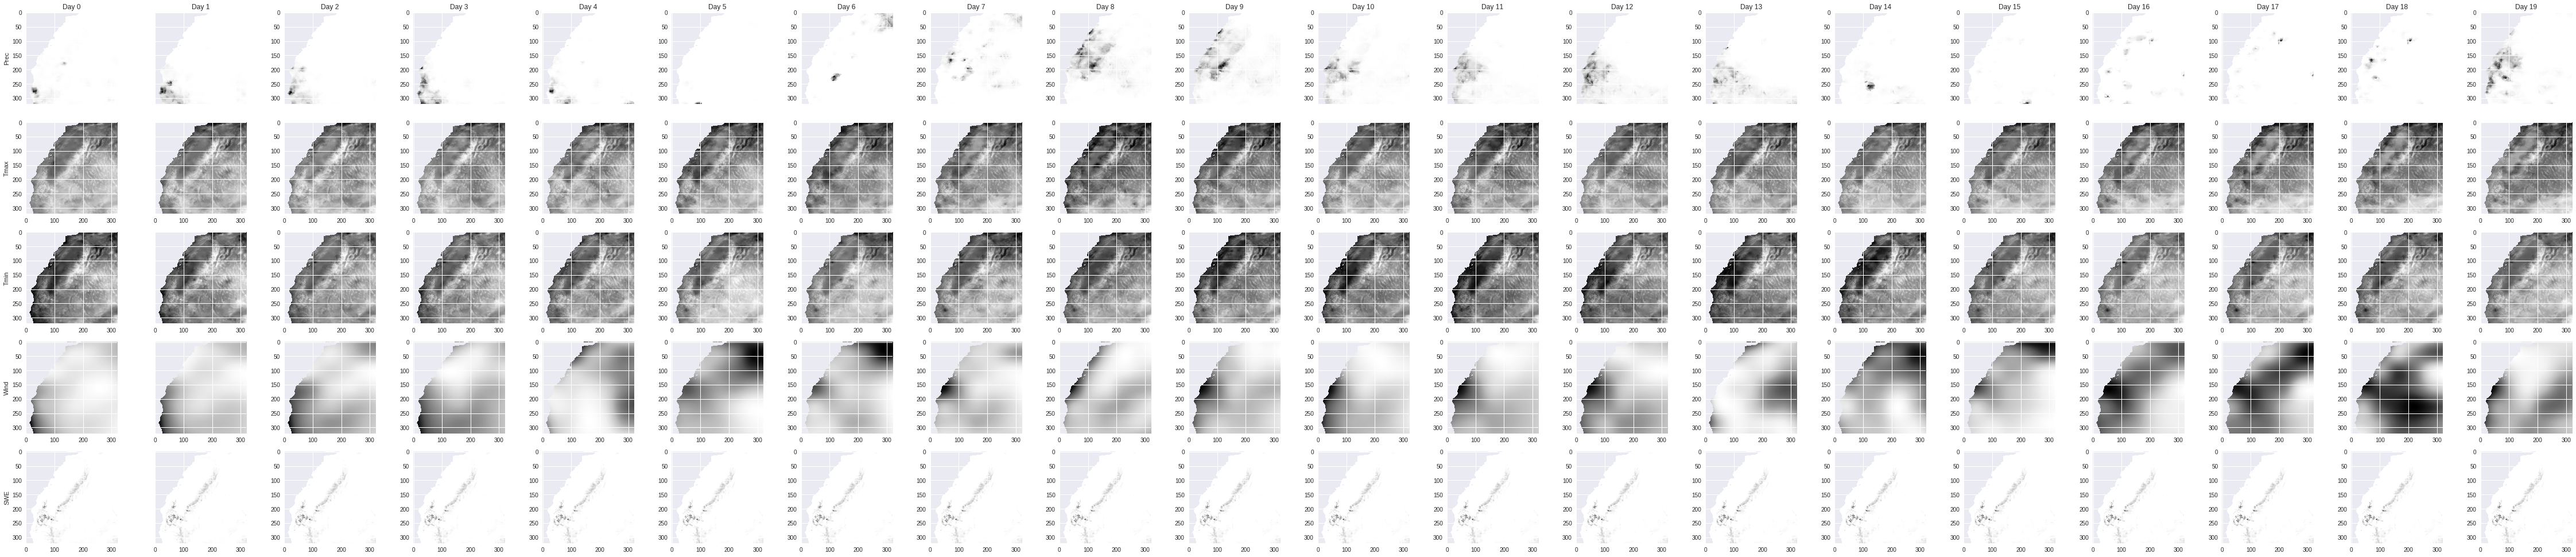

In [11]:
plot_days(20, 0)
#Plotting all data channels for 20 days, from 0-19

15


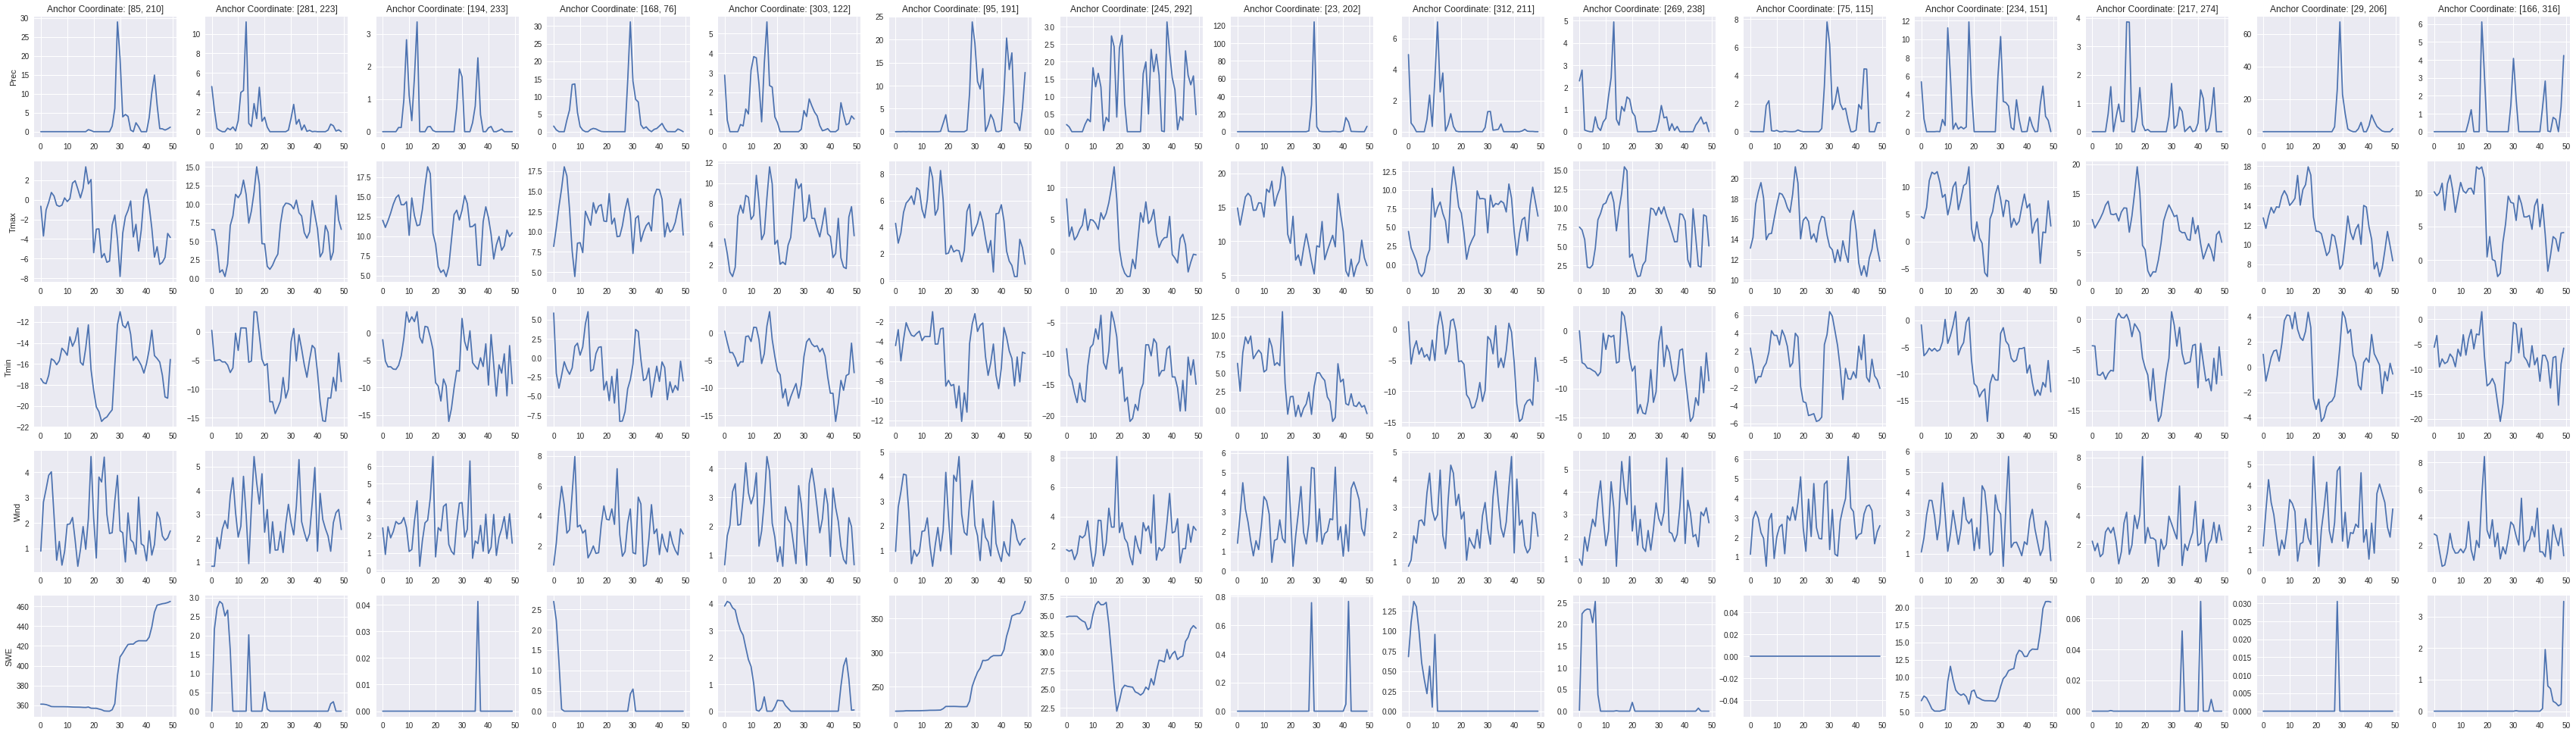

In [0]:
#precdat = x['data'][...,:]
#sampling 20 anchor points, sampling data from each channel for each point for 50 days starting on day 13, and displaying plots corresponding to valid anchors
plot_anchors([np.random.randint(320, size=20), np.random.randint(320, size=20)], 50, 13)

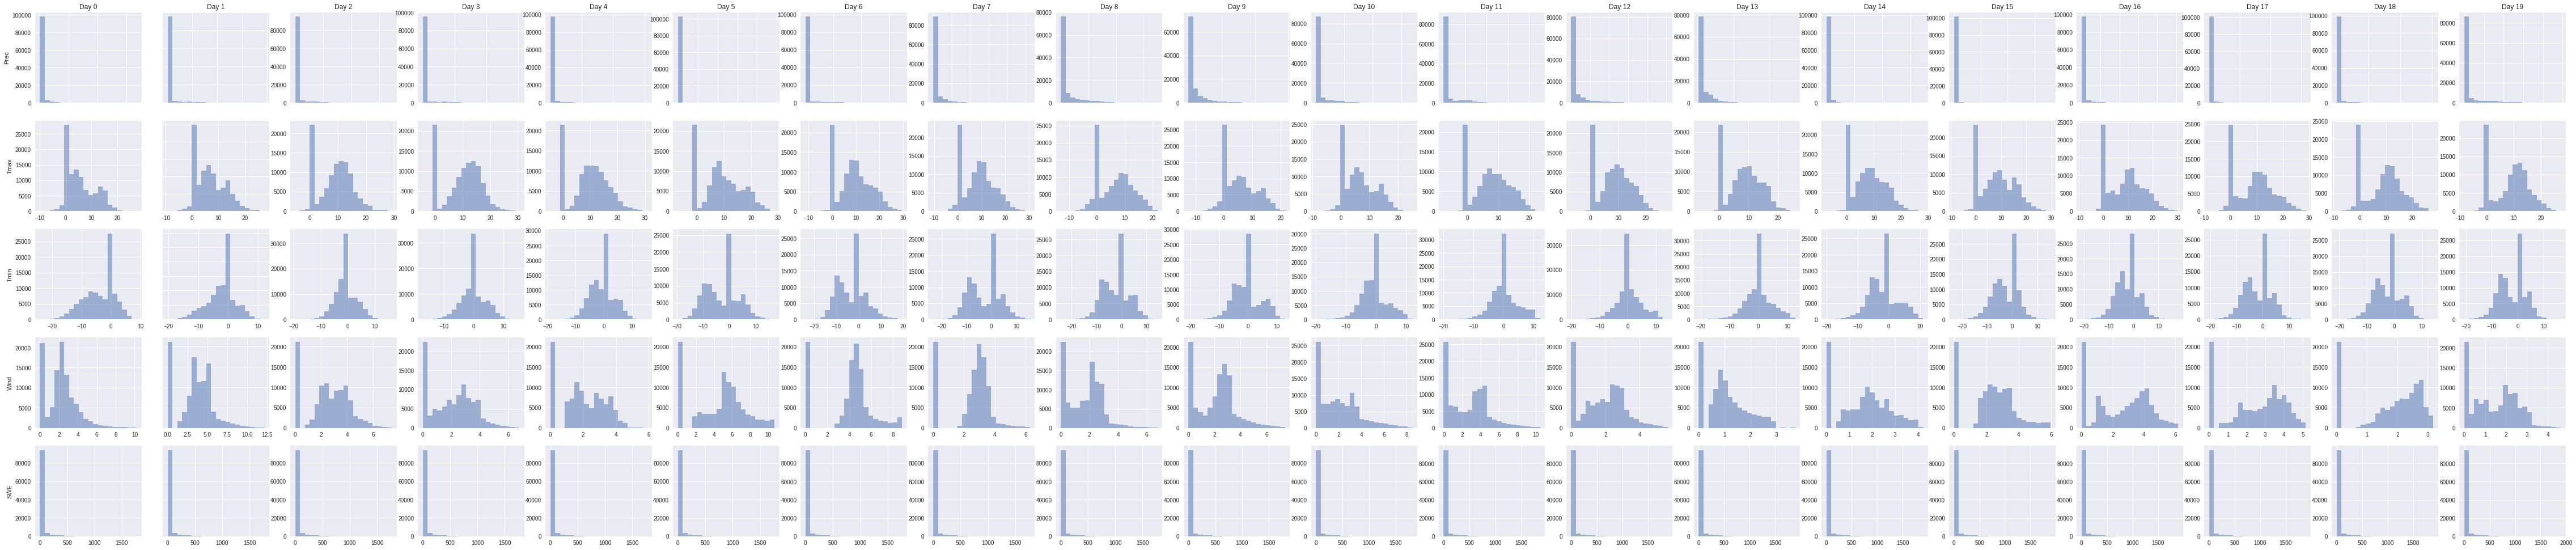

In [0]:
plot_hist(20, 0, 0.5, 20)